In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline


boston = datasets.load_boston()            # Load Boston Dataset
df = pd.DataFrame(boston.data[:, 12])      # Create DataFrame using only the LSAT feature
df.columns = ['LSTAT']
df['MEDV'] = boston.target                 # Create new column with the target MEDV
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


# Decision Tree (Päätöspuu)

In [58]:
from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model

X = df[['LSTAT']].values                          # Assign matrix X
y = df['MEDV'].values                             # Assign vector y

sort_idx = X.flatten().argsort()                  # Sort X and y by ascending values of X
X = X[sort_idx]
y = y[sort_idx]

tree = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=3)         
tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

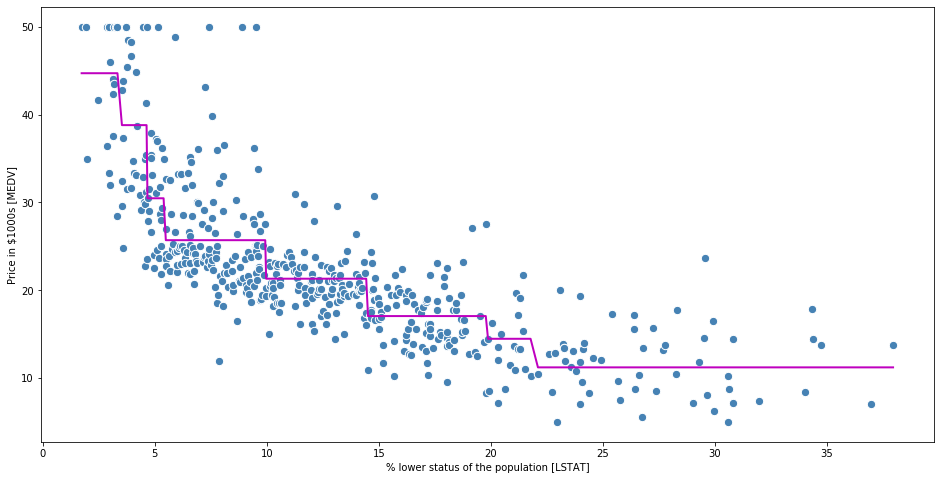

In [62]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, tree.predict(X),                      # Plot predicted target against features
         color='m', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

# Random Forest (Satunnainen metsä)

In [61]:
from sklearn.ensemble import RandomForestRegressor

treeRF = RandomForestRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=3)         
treeRF.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

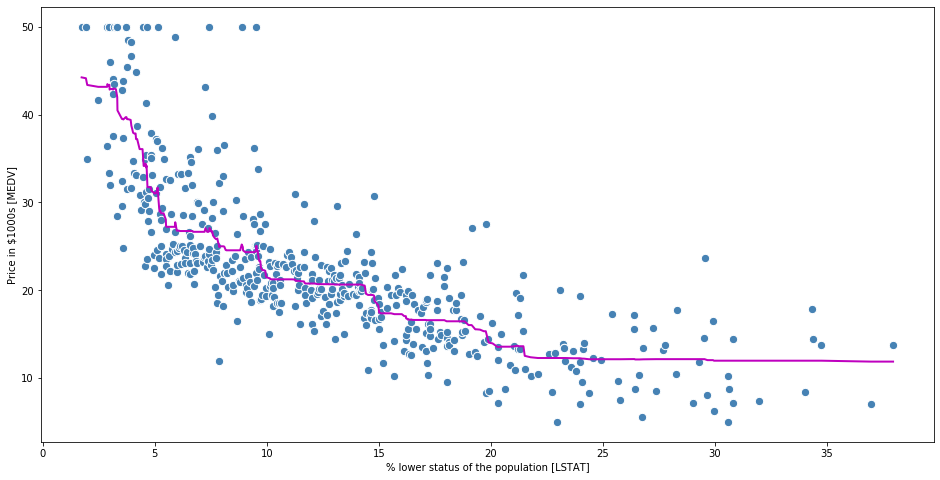

In [54]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, treeRF.predict(X),                      # Plot predicted target against features
         color='m', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

# XGBoost

In [63]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

treeXGB = XGBRegressor()         
treeXGB.fit(X, y)

[21:03:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

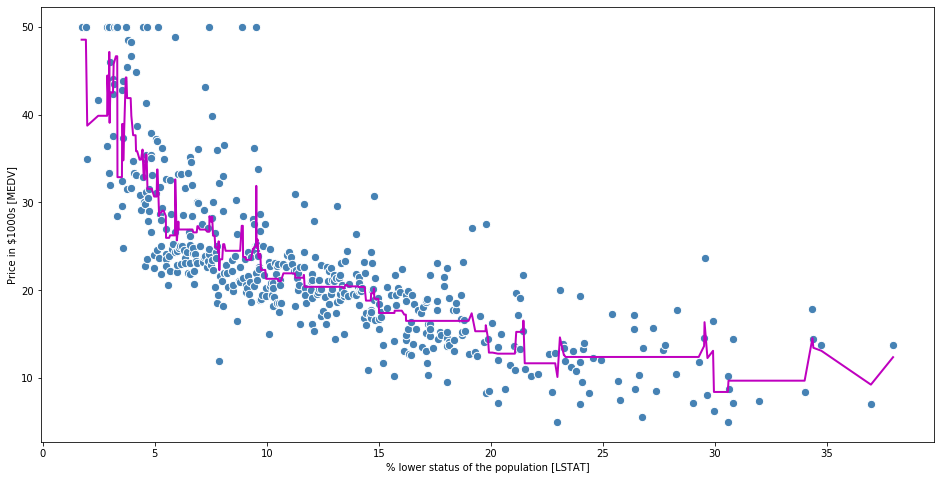

In [64]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, treeXGB.predict(X),                      # Plot predicted target against features
         color='m', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()